In [4]:
from numpy import arange
from matplotlib import pyplot
from numpy import asarray
from numpy.random import rand
from numpy.random import seed

Define the objective function to be f(x) = x^2. Next define its derivative.

In [69]:
def objective(x):
    return x**4 - 2*x**3 + 3*x

   

In [70]:
# derivative of objective function
def derivative(x):
    return 4*x**3 - 6*x**2 + 3

In [71]:
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max+0.1, 0.1)
# compute targets
results = objective(inputs)

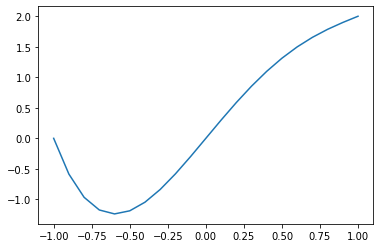

In [72]:
# create a line plot of input vs result
pyplot.plot(inputs, results)
# show the plot
pyplot.show()

Next we need to define our Vanilla Gradient Descent. We will be storing all our scores along the way so that we can get a neat little plot at the end.

In [73]:
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

>0 f([0.83156549]) = 1.82281
>1 f([0.71645479]) = 1.67733
>2 f([0.57733463]) = 1.45823
>3 f([0.40035001]) = 1.09840
>4 f([0.17085083]) = 0.50343
>5 f([-0.11363002]) = -0.33779
>6 f([-0.40529609]) = -1.05575
>7 f([-0.58010676]) = -1.23663
>8 f([-0.60010454]) = -1.23840
>9 f([-0.5975841]) = -1.23842
>10 f([-0.59795952]) = -1.23843
>11 f([-0.59790466]) = -1.23843
>12 f([-0.5979127]) = -1.23843
>13 f([-0.59791152]) = -1.23843
>14 f([-0.59791169]) = -1.23843
>15 f([-0.59791167]) = -1.23843
>16 f([-0.59791167]) = -1.23843
>17 f([-0.59791167]) = -1.23843
>18 f([-0.59791167]) = -1.23843
>19 f([-0.59791167]) = -1.23843
>20 f([-0.59791167]) = -1.23843
>21 f([-0.59791167]) = -1.23843
>22 f([-0.59791167]) = -1.23843
>23 f([-0.59791167]) = -1.23843
>24 f([-0.59791167]) = -1.23843
>25 f([-0.59791167]) = -1.23843
>26 f([-0.59791167]) = -1.23843
>27 f([-0.59791167]) = -1.23843
>28 f([-0.59791167]) = -1.23843
>29 f([-0.59791167]) = -1.23843


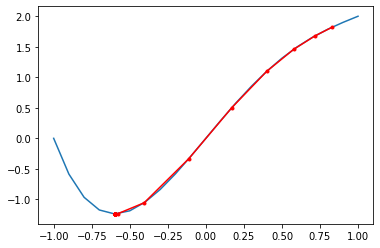

In [74]:
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

In [75]:
def gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = momentum * change - step_size * gradient
		# take a step
		solution = solution + new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

>0 f([0.83156549]) = 1.82281
>1 f([0.68570653]) = 1.63337
>2 f([0.49509902]) = 1.30266
>3 f([0.23644652]) = 0.68603
>4 f([-0.11289265]) = -0.33564
>5 f([-0.50947204]) = -1.19656
>6 f([-0.71981302]) = -1.14506
>7 f([-0.62285393]) = -1.23479
>8 f([-0.56434426]) = -1.23213
>9 f([-0.58380675]) = -1.23730
>10 f([-0.60555569]) = -1.23809
>11 f([-0.60323941]) = -1.23826
>12 f([-0.59639886]) = -1.23841
>13 f([-0.59607811]) = -1.23841
>14 f([-0.59807962]) = -1.23842
>15 f([-0.59848749]) = -1.23842
>16 f([-0.59794924]) = -1.23843
>17 f([-0.59774469]) = -1.23842
>18 f([-0.59787473]) = -1.23843
>19 f([-0.59795609]) = -1.23843
>20 f([-0.59792957]) = -1.23843
>21 f([-0.59790109]) = -1.23843
>22 f([-0.59790468]) = -1.23843
>23 f([-0.59791377]) = -1.23843
>24 f([-0.59791409]) = -1.23843
>25 f([-0.59791141]) = -1.23843
>26 f([-0.59791091]) = -1.23843
>27 f([-0.59791163]) = -1.23843
>28 f([-0.5979119]) = -1.23843
>29 f([-0.59791172]) = -1.23843


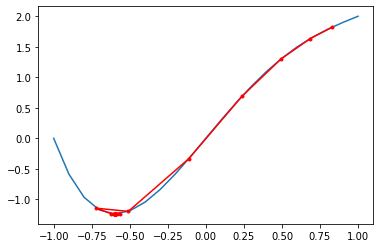

In [76]:
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()